# 4.10

## Contents

### I. Import libraries and datasets


### II. Consider any security implications that might exist for this new data. Address any PII data in the data before continuing your analysis.


### III.
#### A. Create regional segmentation of data

#### B Determine whether there’s a difference in spending habits between the different U.S. regions.


### IV. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.


### V. Create a profiling variable

#### A. Creating a profile of users based on age income

#### B. Create profile of users w/o dependents

#### C. Analyze spending habits of the customer profile

#### D. Profile based on department table

#### E. Profile of items puchase trend by customer profile


### VI. Visuals

#### A. Bar gragh of customer profile

#### B. Pie chart of users w/o dependents

#### C. Bar graph of customer profile and dependents

#### D. Bar graph of spending and customer profile

#### E. Line graph of most sold category in department

#### F. Horizontal bar chart of customers buying trends



### VII. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

#### A. Usage frequency and expenditure by age and income

#### B. Usage frequency and expenditure by family status


### VIII. Comparison: Customer profile V.S. Regions/ departments

#### A. Customer profile v.s Region - Stacked Bar

#### B. Spending v.s Region - bar

#### C. Department v.s region

#### D. Loyalty status vs department

#### E. loyalty status vs Region

### X. Export final data set

## Importing libraries

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Data

In [6]:
# Set path
path = r'/Users/mohammedRusso/Documents/DATA_ANALYST_COURSE/DATA_Immersion_Submissions/Assingment 4/01-2025 Instacart Basket Analysis'

In [8]:
# import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'prepared Data', 'ords_prods_cust_merge.pkl'))

In [9]:
# Checking dataframe import
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,First Name,Last Name,Gender,State,Age,Date Joined,Number of dependents,Family status,Income
0,1888640,196356,14,2,0,12.0,25773,23,0,#2 Coffee Filters,...,Frequent customer,Thomas,Johnson,Male,Colorado,58,9/9/2019,0,single,31381
1,2754998,68576,6,0,8,7.0,25773,16,1,#2 Coffee Filters,...,Frequent customer,Kevin,Ramsey,Male,Oregon,60,3/6/2019,1,married,100174
2,3086607,168921,27,2,20,0.0,25773,2,0,#2 Coffee Filters,...,Frequent customer,Eric,Hobbs,Male,District of Columbia,60,2/12/2020,2,married,155816
3,429310,88247,2,4,10,8.0,25773,12,0,#2 Coffee Filters,...,Frequent customer,Harold,Douglas,Male,Kansas,45,1/3/2018,2,married,137340
4,1836950,15906,2,3,14,12.0,25773,7,0,#2 Coffee Filters,...,Regular customer,Andrew,Booker,Male,Utah,44,12/23/2019,0,single,123608


In [10]:
# Check df size
df.shape

(32404859, 33)

### II. Consider any security implications that might exist for this new data. Address any PII data in the data before continuing your analysis.

In [15]:
# Check to verify columns the are PII
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_perdiod_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_days_order', 'frequency_flag',
       'First Name', 'Last Name', 'Gender', 'State', 'Age', 'Date Joined',
       'Number of dependents', 'Family status', 'Income'],
      dtype='object')

#### Columns 'First Name' & 'Last Name' are considered PII elements

### III-A. Create regional segmentation of data

In [12]:
# Assigning Norteast region based on geographical location
df.loc[ df['State'] == 'Maine', 'Region'] = 'Northeast'
df.loc[ df['State'] == 'New Hampshire', 'Region'] = 'Northeast'
df.loc[ df['State'] == 'Vermont', 'Region'] = 'Northeast'
df.loc[ df['State'] == 'Massachusetts', 'Region'] = 'Northeast'
df.loc[ df['State'] == 'Rhode Island', 'Region'] = 'Northeast'
df.loc[ df['State'] == 'Connecticut', 'Region'] = 'Northeast'
df.loc[ df['State'] == 'New York', 'Region'] = 'Northeast'
df.loc[ df['State'] == 'Pennsylvania', 'Region'] = 'Northeast'
df.loc[ df['State'] == 'New Jersey', 'Region'] = 'Northeast'

In [14]:
# Assigning Midwest region based on geographical location
df.loc[ df['State'] == 'Wisconsin', 'Region'] = 'Midwest'
df.loc[ df['State'] == 'Michigan', 'Region'] = 'Midwest'
df.loc[ df['State'] == 'Illinois', 'Region'] = 'Midwest'
df.loc[ df['State'] == 'Indiana', 'Region'] = 'Midwest'
df.loc[ df['State'] == 'Ohio', 'Region'] = 'Midwest'
df.loc[ df['State'] == 'North Dakota', 'Region'] = 'Midwest'
df.loc[ df['State'] == 'South Dakota', 'Region'] = 'Midwest'
df.loc[ df['State'] == 'Nebraska', 'Region'] = 'Midwest'
df.loc[ df['State'] == 'Kansas', 'Region'] = 'Midwest'
df.loc[ df['State'] == 'Minnesota', 'Region'] = 'Midwest'
df.loc[ df['State'] == 'Iowa', 'Region'] = 'Midwest'
df.loc[ df['State'] == 'Missouri', 'Region'] = 'Midwest'

In [16]:
# Assigning South region based on geographical location
df.loc[ df['State'] == 'Delaware', 'Region'] = 'South'
df.loc[ df['State'] == 'Maryland', 'Region'] = 'South'
df.loc[ df['State'] == 'District of Columbia', 'Region'] = 'South'
df.loc[ df['State'] == 'Virginia', 'Region'] = 'South'
df.loc[ df['State'] == 'West Virginia', 'Region'] = 'South'
df.loc[ df['State'] == 'North Carolina', 'Region'] = 'South'
df.loc[ df['State'] == 'South Carolina', 'Region'] = 'South'
df.loc[ df['State'] == 'Georgia', 'Region'] = 'South'
df.loc[ df['State'] == 'Florida', 'Region'] = 'South'
df.loc[ df['State'] == 'Kentucky', 'Region'] = 'South'
df.loc[ df['State'] == 'Tennessee', 'Region'] = 'South'
df.loc[ df['State'] == 'Mississippi', 'Region'] = 'South'
df.loc[ df['State'] == 'Alabama', 'Region'] = 'South'
df.loc[ df['State'] == 'Oklahoma', 'Region'] = 'South'
df.loc[ df['State'] == 'Texas', 'Region'] = 'South'
df.loc[ df['State'] == 'Arkansas', 'Region'] = 'South'
df.loc[ df['State'] == 'Louisiana', 'Region'] = 'South'

In [18]:
# Assigning West region based on geographical location
df.loc[ df['State'] == 'Idaho', 'Region'] = 'West'
df.loc[ df['State'] == 'Montana', 'Region'] = 'West'
df.loc[ df['State'] == 'Wyoming', 'Region'] = 'West'
df.loc[ df['State'] == 'Nevada', 'Region'] = 'West'
df.loc[ df['State'] == 'Utah', 'Region'] = 'West'
df.loc[ df['State'] == 'Colorado', 'Region'] = 'West'
df.loc[ df['State'] == 'Arizona', 'Region'] = 'West'
df.loc[ df['State'] == 'New Mexico', 'Region'] = 'West'
df.loc[ df['State'] == 'Alaska', 'Region'] = 'West'
df.loc[ df['State'] == 'Washington', 'Region'] = 'West'
df.loc[ df['State'] == 'Oregon', 'Region'] = 'West'
df.loc[ df['State'] == 'California', 'Region'] = 'West'
df.loc[ df['State'] == 'Hawaii', 'Region'] = 'West'

In [20]:
# Check output
df['Region'].value_counts(dropna = False)

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

### III-B Determine whether there’s a difference in spending habits between the different U.S. regions.

In [23]:
# Crosstab region and speding_flag
crosstab = pd.crosstab(df['Region'], df['spending_flag'], dropna = False)

In [31]:
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


#### The South region has both the most numner of hign and low spenders. This could be du to the fact South region has most number of states resulting in higher poplation. Therefore, it would not be practical to assume, spending trends are influenced by regions

### IV. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [25]:
# Create new flag to separate low anf high activity customers
df.loc[df['max_order'] < 5, 'activity_flag'] = 'Low activity customer'
df.loc[df['max_order'] >= 5, 'activity_flag'] = 'High activity customer'

In [27]:
# Check output
df['activity_flag'].value_counts()

activity_flag
High activity customer    30964564
Low activity customer      1440295
Name: count, dtype: int64

In [29]:
# Exclude low activity customers from dataset
df_new = df[df['activity_flag'] != 'Low activity customer']

In [31]:
# verify new dataframe excludes low activity customers
df_new.shape

(30964564, 35)

In [33]:
# Export the new sample 
df_new.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'IC_low_act_cust_excluded.pkl'))

### V. Create a profiling variable
####    A. Creating a profile of users based on age income  

In [36]:
# Creating profile with age and income
def customer_profile(row):
    if row['Age'] <= 25 and row['Income'] <= 50000:
        return 'young adults w low income'
    elif row['Age'] <= 25 and row['Income'] < 150000:
        return 'young adults w mid income'
    elif row['Age'] <= 25 and row['Income'] >= 150000:
        return 'young adults w high income'

    elif 25 < row['Age'] < 64 and row['Income'] <= 50000:
        return 'adults w low income'
    elif 25 < row['Age'] < 64 and row['Income'] < 150000:
        return 'adults w mid income'
    elif 25 < row['Age'] < 64 and row['Income'] >= 150000:
        return 'adults w high income'

    elif row['Age'] >= 65 and row['Income'] <= 50000:
        return 'seniors w low income'
    elif row['Age'] >= 65 and row['Income'] < 150000:
        return 'seniors w mid income'
    elif row['Age'] >= 65 and row['Income'] >= 150000:
        return 'seniors w high income'

In [38]:
df_new['customer_profile'] = df_new.apply(customer_profile, axis=1)

/var/folders/d6/b55202qs51369fgxv1dvzry80000gn/T/ipykernel_18664/1158799132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['customer_profile'] = df_new.apply(customer_profile, axis=1)


In [176]:
df_count = df_new['customer_profile'].value_counts()

In [179]:
df_count

customer_profile
adults w mid income           14145932
seniors w mid income           5976618
young adults w mid income      3228469
adults w high income           2213024
adults w low income            2040714
seniors w high income          1544492
seniors w low income            674434
young adults w low income       599269
young adults w high income       36780
Name: count, dtype: int64

### VI. Create an appropriate visualization to show the distribution of profiles.
####  A. Bar gragh of customer profile

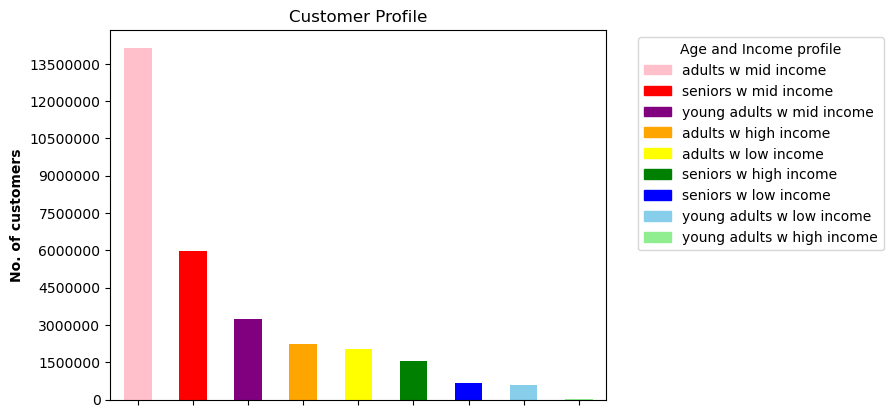

In [230]:
import matplotlib.patches as mpatches

# Define colors (ensure it matches the number of x-tick labels)
colors = ['pink', 'red', 'purple', 'orange', 'yellow', 'green', 'blue', 'skyblue', 'lightgreen']

# Plot bar chart
cp_bar = df_count.plot.bar(color=colors, linestyle='--')

# Get x-axis labels
x_labels = df_count.index.astype(str)  # Convert index to string if necessary

#hide category from graph
plt.xticks(visible = False)

plt.title('Customer Profile')
plt.ylabel('',weight='black')
plt.ylabel('No. of customers')
plt.xlabel('')
#set value range on y-axis
plt.yticks(np.arange(0,15000000,1500000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,1500000)])
# Create legend handles manually
legend_patches = [mpatches.Patch(color=colors[i], label=x_labels[i]) for i in range(len(x_labels))]

# Add legend
plt.legend(handles=legend_patches, title="Age and Income profile", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()



In [60]:
# export image
cp_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_age_income_profile.png'))

### V-B. Create profile of users w/o dependents

In [62]:
# Create a flag of user with & without dependents
df_new.loc[df_new['Number of dependents'] == 0, 'dependent_flag'] = 'No Dependents'
df_new.loc[df_new['Number of dependents'] >=1, 'dependent_flag']  = 'With Dependents'

/var/folders/d6/b55202qs51369fgxv1dvzry80000gn/T/ipykernel_18664/324618469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[df_new['Number of dependents'] == 0, 'dependent_flag'] = 'No Dependents'


In [64]:
# Check results
df_dependents= df_new['dependent_flag'].value_counts(dropna = False)

In [66]:
df_dependents

dependent_flag
With Dependents    23224883
No Dependents       7739681
Name: count, dtype: int64

#### VI-B. Pie chart of users w/o dependents

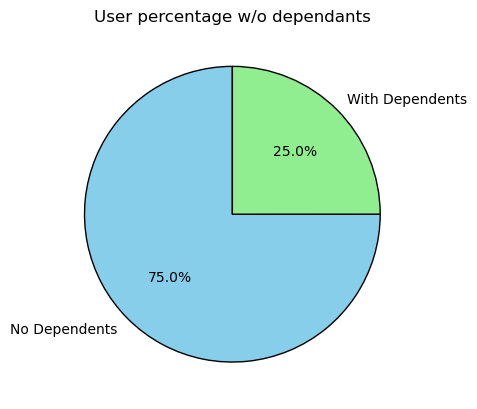

In [70]:
#create pie chart of users w/o dependents
df_pie = df_dependents.plot.pie(autopct='%1.1f%%', labels=df_new['dependent_flag'], startangle=90, colors=['skyblue','lightgreen'], wedgeprops={'edgecolor':'black'})
plt.ylabel('')  # Hide the y-label
plt.title('User percentage w/o dependants')
plt.show()

# Export chart
df_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'pie_dependents.png'))


In [70]:
# Cross customer profile and dependents
cross_cp_dp = pd.crosstab(df_new['dependent_flag'], df_new['customer_profile'], dropna = True)
cross_cp_dp

customer_profile,adults w high income,adults w low income,adults w mid income,seniors w high income,seniors w low income,seniors w mid income,young adults w high income,young adults w low income,young adults w mid income
dependent_flag,,,,,,,,,
No Dependents,570216,521627,3538807,395159,156193,1470606,8419,155609,789199
With Dependents,1642808,1519087,10607125,1149333,518241,4506012,28361,443660,2439270


#### VI-C. Bar graph of customer profile and dependents

(array([0, 1]), [Text(0, 0, 'No Dependents'), Text(1, 0, 'With Dependents')])

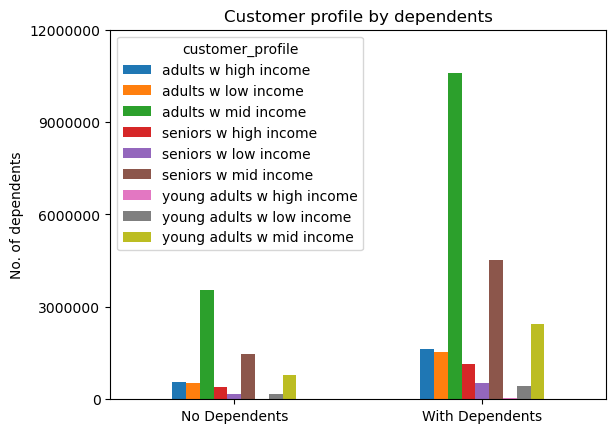

In [73]:
# bar chart
cp_dp_bar = cross_cp_dp.plot.bar()
plt.title('Customer profile by dependents')
plt.xlabel('')
plt.ylabel('No. of dependents')
#set value range on y-axis
plt.yticks(np.arange(0,15000000,3000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,3000000)])
plt.xticks(rotation=0)

#### Adults age 25-64 and seniors age 65+ with mid income range ($50,000 - 150,000) stands out in both w/o dependents

In [76]:
# Export the chart
cp_dp_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'customer_profile_bar.png'))

### V-C. Analyze spending habits of the customer profile

In [74]:
#create cross between customer profile and spending flag
cp_spending_cross = pd.crosstab(df_new['spending_flag'], df_new['customer_profile'], dropna = True)
cp_spending_cross

customer_profile,adults w high income,adults w low income,adults w mid income,seniors w high income,seniors w low income,seniors w mid income,young adults w high income,young adults w low income,young adults w mid income
spending_flag,,,,,,,,,
High spender,235328,1469,119847,106536,0,50350,36780,557,36665
Low spender,1977696,2039245,14026085,1437956,674434,5926268,0,598712,3191804


#### VI-D. Bar graph of spending and customer profile 

(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

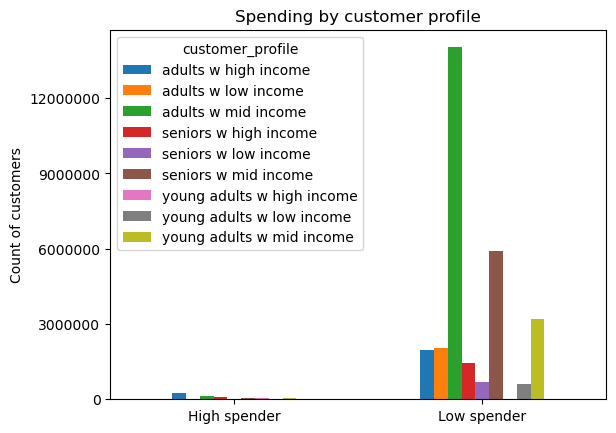

In [80]:
# Create bar chart
spending_cp_bar = cp_spending_cross.plot.bar()
plt.title('Spending by customer profile')
plt.xlabel('')
plt.ylabel('Count of customers')
plt.yticks(np.arange(0,15000000,3000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,3000000)])
plt.xticks(rotation=0)

In [84]:
# Export the chart
spending_cp_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'spending_cp_bar.png'))

### V-D. Profile based on department table

In [86]:
# Import departments dataframe
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [88]:
dept.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [91]:
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [90]:
# merge depatment with existing combined dataframe
df_f_merged = df_new.merge(dept, on='department_id', indicator='created')

In [97]:
prods_count = df_f_merged['department'].value_counts()
prods_count

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

#### VI-E. Line graph of most sold category in department 

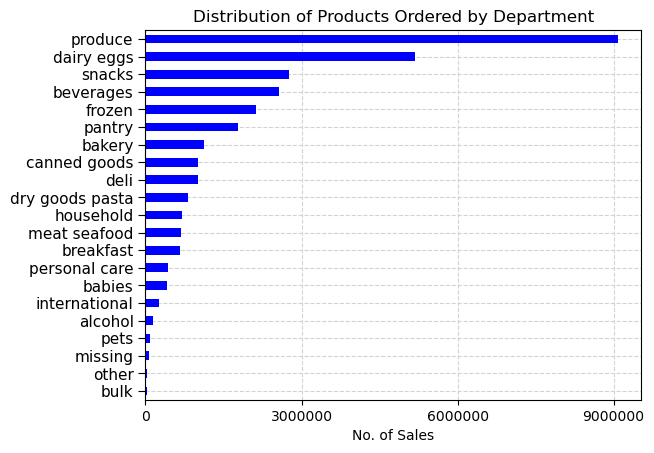

In [94]:
# line graph
depts_bar = df_f_merged['department'].value_counts(ascending=True).plot(kind='barh', color='blue', xlabel = 'Count', title='Products Ordered by Department')
plt.xticks(np.arange(0,10000000,3000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,10000000,3000000)])

plt.gca().set_axisbelow(True)      # True ---> grid is behind bars
plt.grid(axis='both', color='lightgray', linestyle='dashed')

plt.title('Distribution of Products Ordered by Department')
plt.ylabel('',weight='black')
plt.xlabel('No. of Sales')
plt.yticks(fontsize=11)
plt.tick_params(axis = 'y' , length=5 )

# Export chart
depts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'prods_dept.png'))

### V-E. Profile of items puchase trend by customer profile

In [98]:
# create cross with customer profile and products ordered
cp_pd_cross = pd.crosstab(df_f_merged['department'], df_f_merged['customer_profile'], dropna = True)
cp_pd_cross

customer_profile,adults w high income,adults w low income,adults w mid income,seniors w high income,seniors w low income,seniors w mid income,young adults w high income,young adults w low income,young adults w mid income
department,,,,,,,,,
alcohol,13392,11227,62098,9063,3573,24057,1192,3113,14883
babies,30919,17935,197388,20457,5382,80365,216,5728,45290
bakery,84345,65191,516747,58166,20549,217282,1832,19368,118673
beverages,177893,229425,1119152,123980,82647,477393,3201,65404,249738
breakfast,47517,54645,297027,32598,19651,123047,1011,15699,68767
bulk,2159,2895,14685,1409,916,6620,3,810,3493
canned goods,75705,48483,477895,51598,14733,201178,1429,14807,110076
dairy eggs,376381,303741,2396792,259443,99450,1009179,6443,91930,549120
deli,71303,65142,460510,50337,20589,194273,1009,19066,104480


#### VI-F. Horizontal bar chart of customers buying trends

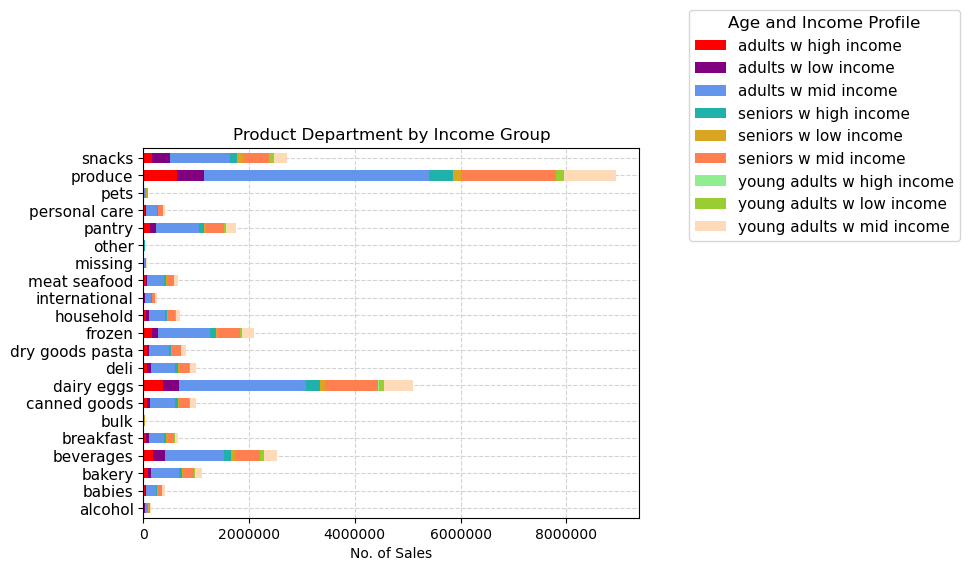

In [100]:
# plot bar chart
colors = ['red','purple','cornflowerblue','lightseagreen','goldenrod','coral','lightgreen','yellowgreen','peachpuff']
dept_income_bar = cp_pd_cross.plot.barh(color=colors, stacked =True, width = 0.6)

# adjust legend
leg = plt.legend(loc=(1.1,0.75),title='Age and Income Profile' , title_fontsize= 12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')
    
# set up a grid behind the bars
plt.gca().set_axisbelow(True) 
plt.grid(axis='both', color='lightgray', linestyle='dashed')
 
# formatting
plt.title('Product Department by Income Group')
plt.ylabel('',weight='black')
plt.xlabel('No. of Sales')
plt.xticks(np.arange(0,10000000,2000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,10000000,2000000)])
plt.yticks(fontsize=11)

# export the bar chart

dept_income_bar.figure.savefig(os.path.join(
    path, '04 Analysis' , 'Visualization' , '7c_dept_by_income_bar.png' ), dpi=300, bbox_inches='tight')

# Export chart
dept_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'barh_dept_income.png'))

In [108]:
df_f_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'IC_orders_products_customers_merged.pkl'))

## VII. Aggregation: Usage frequency and expenditure

### A.Usage frequency and expenditure by age and income

In [115]:
df_new.loc[df_new['prices'] >1000, 'prices'] = np.nan

In [117]:
# Aggregate variables for customer profiles for usage frequency
df_new.groupby('customer_profile').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

order_number                days_since_prior_order  \
                                    max min       mean                    max   
customer_profile                                                                
adults w high income                 99   1  18.209203                   30.0   
adults w low income                  99   1  16.728598                   30.0   
adults w mid income                  99   1  17.928783                   30.0   
seniors w high income                99   1  17.756895                   30.0   
seniors w low income                 99   1  17.094802                   30.0   
seniors w mid income                 99   1  17.870083                   30.0   
young adults w high income           99   1  21.211120                   30.0   
young adults w low income            99   1  16.793468                   30.0   
young adults w mid income            99   1  18.031769                   30.0   

                                            
                            min       mean  
customer_profile                            
adults w high income        0.0  10.653055  
adults w low income         0.0  11.242310  
adults w mid income         0.0  10.796255  
seniors w high income       0.0  10.771626  
seniors w low income        0.0  11.052428  
seniors w mid income        0.0  10.767697  
young adults w high income  0.0   9.775677  
young adults w low income   0.0  11.113895  
young adults w mid income   0.0  10.752761

#### Young adults with high incomes places the most orders (avg 21.2) and adults with low income place the least (avg 16.72).
#### Adults with low income also places orders least frequently (11.2 days) compared to most frequent orders placed by young adults with high income (every 9.7 days).

### VII-B. Usage frequency and expenditure by family status

In [121]:
# Aggregate variables for family status and usage frequency
df_new.groupby('Family status').agg({'days_since_prior_order': ['min' , 'max' , 'mean'] , 'prices': ['min', 'max', 'mean']})

days_since_prior_order                   \
                                                    min   max       mean   
Family status                                                              
divorced/widowed                                    0.0  30.0  10.750328   
living with parents and siblings                    0.0  30.0  10.750995   
married                                             0.0  30.0  10.820875   
single                                              0.0  30.0  10.813571   

                                 prices                  
                                    min   max      mean  
Family status                                            
divorced/widowed                    1.0  25.0  7.801014  
living with parents and siblings    1.0  25.0  7.800604  
married                             1.0  25.0  7.790278  
single                              1.0  25.0  7.783597

#### family status does not seems to affect ordering habits as all the matrixs are identical.

In [218]:
#cross fam status and last order date
df_new['days_since_prior_order'] = df_new['days_since_prior_order'].fillna(0).astype(int) 
fs_lo = pd.crosstab(df_new['days_since_prior_order'], df_new['Family status'], dropna = True)
fs_lo

/var/folders/d6/b55202qs51369fgxv1dvzry80000gn/T/ipykernel_18664/4244647204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['days_since_prior_order'] = df_new['days_since_prior_order'].fillna(0).astype(int)


Family status,divorced/widowed,living with parents and siblings,married,single
days_since_prior_order,,,,
0,182483,100449,1471338,345024
1,80890,44512,651324,154964
2,126534,70192,1015953,238689
3,160589,89497,1306462,303266
4,178557,98275,1442919,337772
5,179153,102009,1468617,347704
6,210261,118777,1742887,406838
7,290489,164996,2401039,560915
8,160002,91919,1332054,309839


(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000., 4000000.]),
 [Text(0, 0.0, '0.0'),
  Text(0, 500000.0, '0.5'),
  Text(0, 1000000.0, '1.0'),
  Text(0, 1500000.0, '1.5'),
  Text(0, 2000000.0, '2.0'),
  Text(0, 2500000.0, '2.5'),
  Text(0, 3000000.0, '3.0'),
  Text(0, 3500000.0, '3.5'),
  Text(0, 4000000.0, '4.0')])

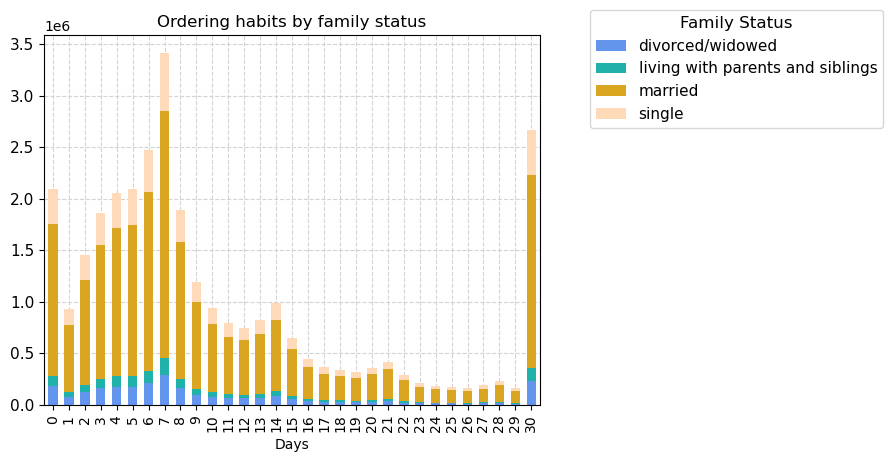

In [228]:
# plot bar chart
colors = ['cornflowerblue','lightseagreen','goldenrod','peachpuff']
fs_lo_bar = fs_lo.plot.bar(color=colors, stacked =True, width = 0.6)

# adjust legend
leg = plt.legend(loc=(1.1,0.75),title='Family Status' , title_fontsize= 12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')
    
# set up a grid behind the bars
plt.gca().set_axisbelow(True) 
plt.grid(axis='both', color='lightgray', linestyle='dashed')
 
# formatting
plt.title('Ordering habits by family status')
plt.ylabel('',weight='black')
plt.xlabel('Days')
plt.yticks(fontsize=11)

In [200]:
fs = df_new['Family status'].value_counts()
fs

Family status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

(array([       0,  6000000, 12000000, 18000000, 24000000]),
 [Text(0, 0, '0'),
  Text(6000000, 0, '6000000'),
  Text(12000000, 0, '12000000'),
  Text(18000000, 0, '18000000'),
  Text(24000000, 0, '24000000')])

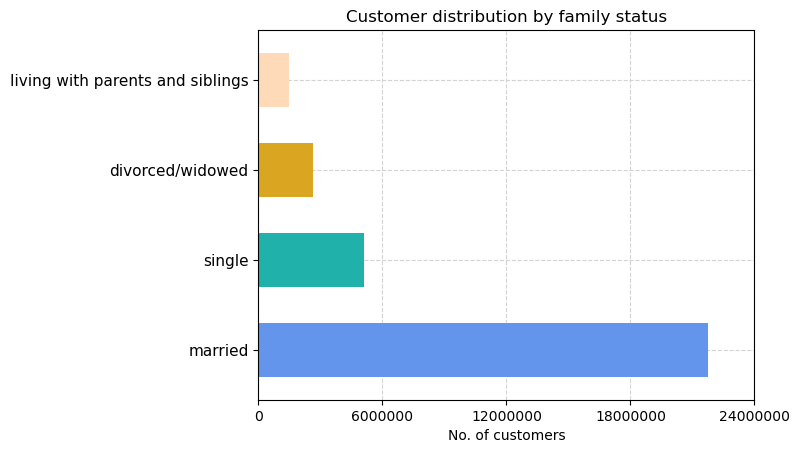

In [210]:
# plot bar chart
colors = ['cornflowerblue','lightseagreen','goldenrod','peachpuff']
fs_bar = fs.plot.barh(color=colors, stacked =True, width = 0.6)
    
# set up a grid behind the bars
plt.gca().set_axisbelow(True) 
plt.grid(axis='both', color='lightgray', linestyle='dashed')
plt.xticks(np.arange(0,25000000,6000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,25000000,6000000)])
 
# formatting
plt.title('Customer distribution by family status')
plt.ylabel('',weight='black')
plt.xlabel('No. of customers')
plt.yticks(fontsize=11)
plt.xticks(rotation =0)

## VIII. Comparison: Customer profile V.S. Regions/ departments

### A. Customer profile v.s Region - Stacked Bar

In [128]:
# create cross betwwen customer profile and region variable
cp_rg = pd.crosstab(df_new['customer_profile'], df_new['Region'], dropna = True)
cp_rg

Region,Midwest,Northeast,South,West
customer_profile,,,,
adults w high income,529202,386021,724651,573150
adults w low income,481653,349969,704578,504514
adults w mid income,3320025,2481062,4697289,3647556
seniors w high income,351727,272436,521007,399322
seniors w low income,147702,127692,224256,174784
seniors w mid income,1404617,1084679,1963198,1524124
young adults w high income,9826,3023,14127,9804
young adults w low income,141363,102492,196358,159056
young adults w mid income,746966,574394,1104504,802605


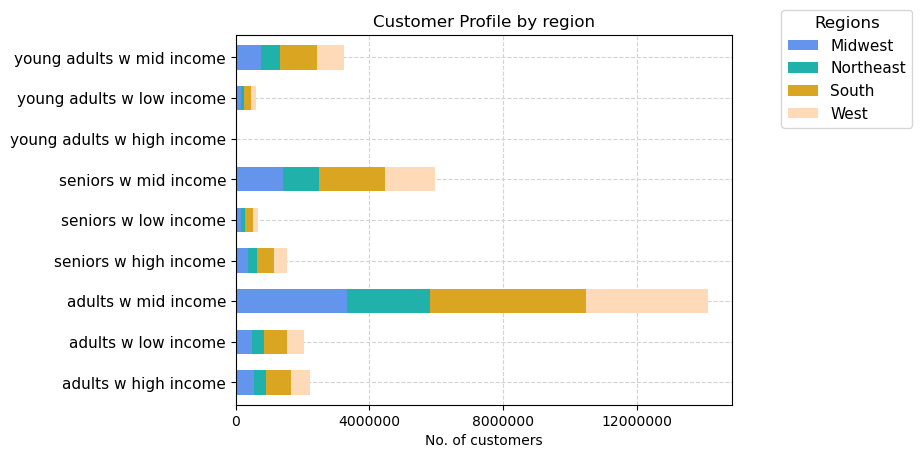

In [130]:
# plot bar chart
colors = ['cornflowerblue','lightseagreen','goldenrod','peachpuff']
cp_region = cp_rg.plot.barh(color=colors, stacked =True, width = 0.6)

# adjust legend
leg = plt.legend(loc=(1.1,0.75),title='Regions' , title_fontsize= 12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')
    
# set up a grid behind the bars
plt.gca().set_axisbelow(True) 
plt.grid(axis='both', color='lightgray', linestyle='dashed')
 
# formatting
plt.title('Customer Profile by region')
plt.ylabel('',weight='black')
plt.xlabel('No. of customers')
plt.xticks(np.arange(0,16000000,4000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,16000000,4000000)])
plt.yticks(fontsize=11)

cp_region.figure.savefig(os.path.join(
    path, '04 Analysis' , 'Visualization' , 'cp_region_bar.png' ), dpi=300, bbox_inches='tight')

### B. Spending v.s Region - bar

In [135]:
#crosstab betwwen spending_flag and region variable
sf_rg = pd.crosstab(df_new['spending_flag'], df_new['Region'], dropna = True)
sf_rg

Region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,148678,103120,199339,152288
Low spender,7112835,5361565,10111800,7774939


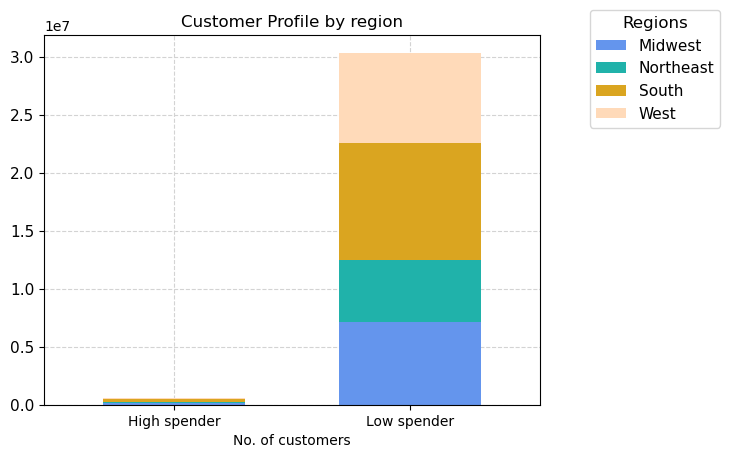

In [137]:
# plot bar chart
colors = ['cornflowerblue','lightseagreen','goldenrod','peachpuff']
sp_region = sf_rg.plot.bar(color=colors, stacked =True, width = 0.6)

# adjust legend
leg = plt.legend(loc=(1.1,0.75),title='Regions' , title_fontsize= 12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')
    
# set up a grid behind the bars
plt.gca().set_axisbelow(True) 
plt.grid(axis='both', color='lightgray', linestyle='dashed')
 
# formatting
plt.title('Customer Profile by region')
plt.ylabel('',weight='black')
plt.xlabel('No. of customers')
plt.yticks(fontsize=11)
plt.xticks(rotation=0)

sp_region.figure.savefig(os.path.join(
    path, '04 Analysis' , 'Visualization' , 'spending_region_bar.png' ), dpi=300, bbox_inches='tight')

#### Most users who purchase products (avg $10 or less) are classified as low spenders and they make of majority of the customers. 
#### We can see in the above graph, most low spenders are in the south region followed by west then midwest.

### C. Department v.s region 

In [155]:
#crosstab betwwen department and region columns
dp_rg = pd.crosstab(df_f_merged['department'], df_f_merged['Region'], dropna = True)
dp_rg

Region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


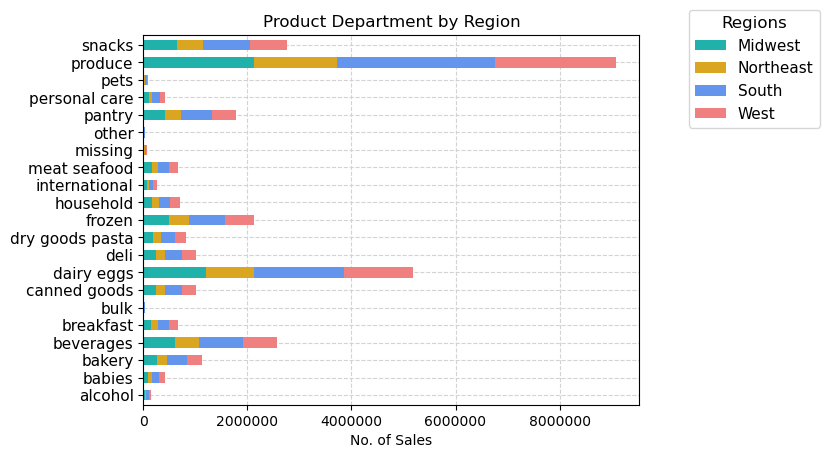

In [157]:
# plot bar chart
colors = ['lightseagreen','goldenrod','cornflowerblue','lightcoral','yellowgreen','peachpuff']
dp_rg = dp_rg.plot.barh(color=colors,stacked =True, width = 0.6)

# Adjust legend
leg = plt.legend(loc=(1.1,0.75),title='Regions', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')
    
    
plt.gca().set_axisbelow(True) 
plt.grid(axis='both', color='lightgray', linestyle='dashed')
 
plt.title('Product Department by Region')
plt.ylabel('',weight='black')
plt.xlabel('No. of Sales')
plt.xticks(np.arange(0,10000000,2000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,10000000,2000000)])
plt.yticks(fontsize=11)

dp_rg.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualization' , 'dp_rg_bar.png' ))

### D. loyalty status vs department

In [160]:
#Cross department and loyal customers
ls_dp = pd.crosstab(df_f_merged['department'], df_f_merged['loyalty_flag'], dropna=False)
ls_dp

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


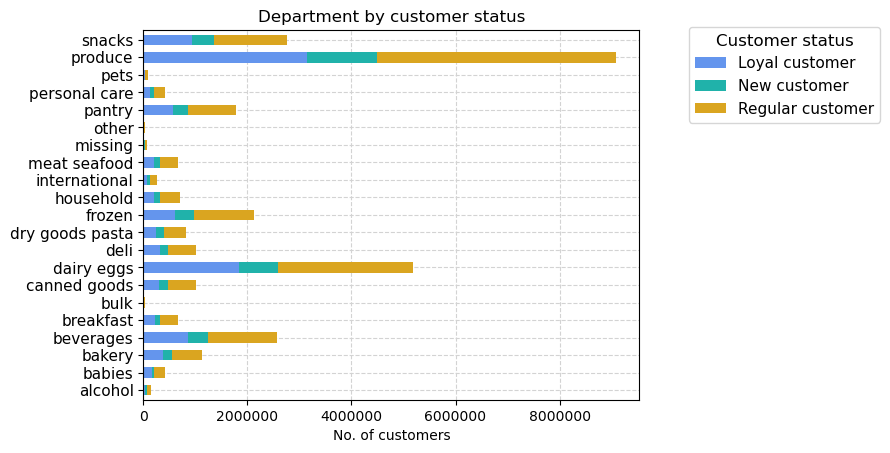

In [162]:
# plot bar chart
colors = ['cornflowerblue','lightseagreen','goldenrod','peachpuff']
dp_cs = ls_dp.plot.barh(color=colors, stacked =True, width = 0.6)

# adjust legend
leg = plt.legend(loc=(1.1,0.75),title='Customer status' , title_fontsize= 12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')
    
# set up a grid behind the bars
plt.gca().set_axisbelow(True) 
plt.grid(axis='both', color='lightgray', linestyle='dashed')
plt.xticks(np.arange(0,10000000,2000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,10000000,2000000)])
# formatting
plt.title('Department by customer status')
plt.ylabel('',weight='black')
plt.xlabel('No. of customers')
plt.yticks(fontsize=11)

dp_cs.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualization' , 'dept_cs_bar.png' ))

### E. loyalty status vs Region

In [165]:
# Cross to check where the customers are
r_lf = pd.crosstab(df['Region'], df['loyalty_flag'], dropna=False)
r_lf

loyalty_flag,Loyal customer,New customer,Regular customer
Region,,,
Midwest,2373774,1472573,3750978
Northeast,1841785,1100207,2780744
South,3405844,2074410,5311631
West,2662690,1596800,4033423


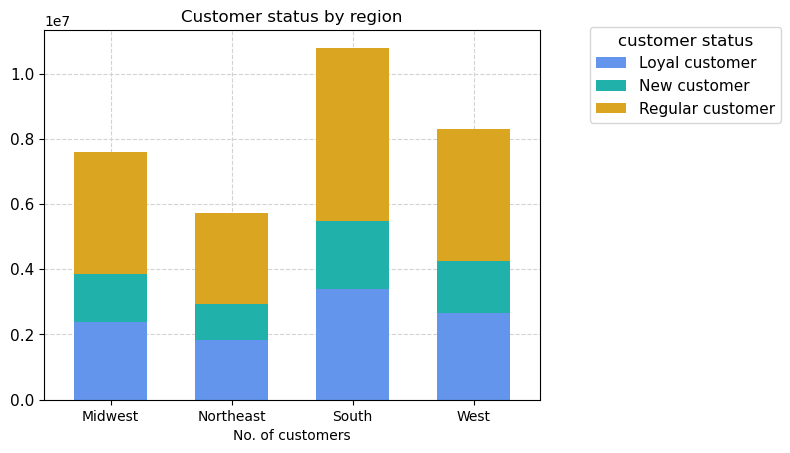

In [167]:
# plot bar chart
colors = ['cornflowerblue','lightseagreen','goldenrod','peachpuff']
r_lf = r_lf.plot.bar(color=colors, stacked =True, width = 0.6)

# adjust legend
leg = plt.legend(loc=(1.1,0.75),title='customer status' , title_fontsize= 12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')
    
# set up a grid behind the bars
plt.gca().set_axisbelow(True) 
plt.grid(axis='both', color='lightgray', linestyle='dashed')
 
# formatting
plt.title('Customer status by region')
plt.ylabel('',weight='black')
plt.xlabel('No. of customers')
plt.yticks(fontsize=11)
plt.xticks(rotation=0)

r_lf.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualization' , 'region_loyalty_bar.png' ))

### X. Export Final dataset

In [171]:
df_new.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'IC_orders_products_customers_merged.pkl'))